## Waiter tips 

In [139]:
import pandas as pd 
import seaborn as sns  

In [60]:
df = pd.read_csv('tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### How many weekdays are present in the data set?

In [61]:
pd.DataFrame(df['day'].unique())

,0
0,Sun
1,Sat
2,Thur
3,Fri


### How many dinner and lunches data are present in the data set?

In [62]:
#df.groupby(['time']).count()['total_bill']
#or
pd.DataFrame(df.time.value_counts())

,time
Dinner,176
Lunch,68


### Potting the chart for that

Text(0.5, 1.0, 'Distribution of Lunch and Dinner')

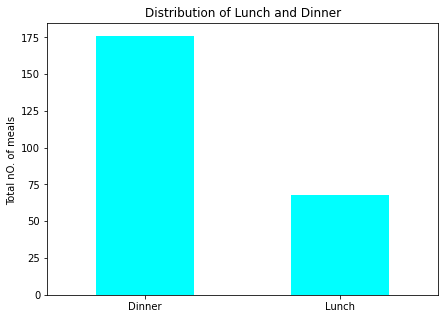

In [63]:
ax = df.time.value_counts().plot(kind= 'bar', color= 'cyan', figsize=(7,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
ax.set_ylabel('Total nO. of meals ')
ax.set_title("Distribution of Lunch and Dinner")

### What is the proportion of dinner and lunch in %? 

In [65]:
pd.DataFrame(df['time'].value_counts(normalize=True) * 100)

,time
Dinner,72.131148
Lunch,27.868852


### When does people pay more tip i.e during lunch or dinner?

In [68]:
df.groupby(['time']).mean()['tip'].reset_index() 

,time,tip
0,Dinner,3.102670
1,Lunch,2.728088


Text(0.5, 1.0, 'Distribution of tip at Lunch and Dinner')

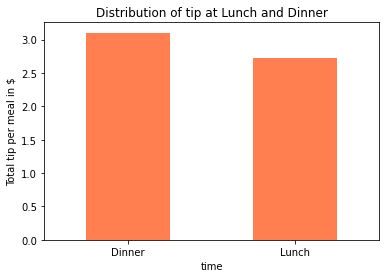

In [100]:
ax1 = df.groupby(['time']).mean()['tip'].plot(kind='bar', color= 'coral')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 0)
ax1.set_ylabel('Total tip per meal in $', size=10)
ax1.set_title("Distribution of tip at Lunch and Dinner")

### Avg tip for different 
### 1. Smoker/ Non-Smoker
### 2. Sex
### 3. Day
### 4. Size     

In [84]:
pd.DataFrame(df.groupby(['smoker', 'sex']).mean()['tip'] )

tip
smoker sex             
No     Female  2.773519
       Male    3.113402
Yes    Female  2.931515
       Male    3.051167

### let us pivot our table structure

In [88]:
pd.DataFrame(df.groupby(['smoker', 'sex']).mean()['tip'] ).unstack(level=0)

tip          
smoker        No       Yes
sex                       
Female  2.773519  2.931515
Male    3.113402  3.051167

In [94]:
df.groupby(['day','size']).mean()['tip'].sort_values(ascending=False).reset_index()

,day,size,tip
0,Thur,6,5.300000
1,Sun,6,5.000000
2,Thur,5,5.000000
3,Fri,4,4.730000
4,Thur,4,4.218000
5,Sat,4,4.123846
6,Sun,4,4.087778
7,Sun,5,4.046667
8,Sat,3,3.797778
9,Sun,3,3.120667


Text(0.5, 1.0, 'Distribution of tip on several week days and table size')

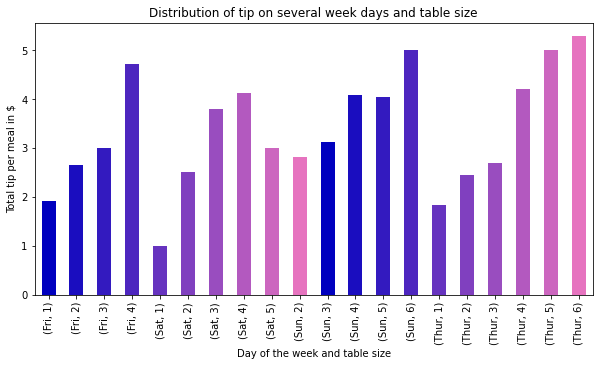

In [109]:
#https://stackoverflow.com/questions/11927715/how-to-give-a-pandas-matplotlib-bar-graph-custom-colors
from matplotlib import pyplot as plt
from itertools import cycle, islice
import pandas, numpy as np
x = [{i:np.random.randint(1,5)} for i in range(10)]
new_df = pandas.DataFrame(x)
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(new_df)))
my_colors = ['g', 'b']*5 # <-- this concatenates the list to itself 5 times.
my_colors = [(0.5,0.4,0.5), (0.75, 0.75, 0.25)]*5 # <-- make two custom RGBs and repeat/alternate them over all the bar elements.
my_colors = [(x/10.0, x/20.0, 0.75) for x in range(len(new_df))]

ax2 = df.groupby(['day','size']).mean()['tip'].plot(kind='bar', color = my_colors, figsize=(10,5))
ax2.set_xticklabels(ax2.get_xticklabels(), rotation =90)
ax2.set_xlabel('Day of the week and table size', size=10)
ax2.set_ylabel('Total tip per meal in $', size=10)
ax2.set_title("Distribution of tip on several week days and table size")

### Create a new column to find out the % of tip on the total bill 

In [114]:
df['tip%'] = (df['tip']/df['total_bill'])*100
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip%
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


### Minimum tip given by male and female smoker type

In [127]:
df.groupby(['sex', 'smoker']).min()['tip%'].unstack(level=0)

sex,Female,Male
smoker,,
No,5.679667,7.180385
Yes,5.643341,3.563814


### Maximum tip fiven by male and female smoker type

In [130]:
df.groupby(['sex','smoker']).max()['tip%'].unstack(level=0)

sex,Female,Male
smoker,,
No,25.267250,29.198966
Yes,41.666667,71.034483


### Visualization of relationship between total bill and tip 

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

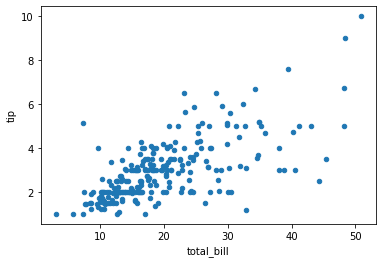

In [138]:
df.plot.scatter(x= 'total_bill', y ='tip')

### Based upon sex the tip distribution 

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

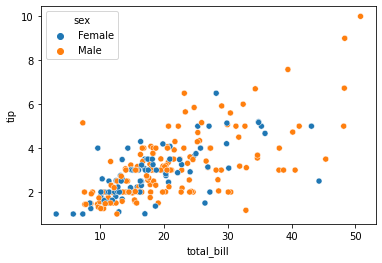

In [146]:
sns.scatterplot(x='total_bill', y= 'tip', data= df, hue = 'sex')

### Based upon time the tip distribution 

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

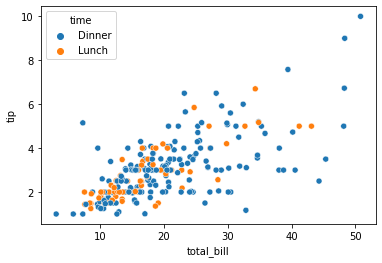

In [147]:
sns.scatterplot(x='total_bill', y= 'tip', data= df, hue = 'time')